# K-Means

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv.xls')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = ['C_ID','Gender','Age','AnnualIncome','SpendingScore']
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Problem Statement - Based on AnnualIncome and SpendingScore, divide the data into different clusters.

In [14]:
x = df[['AnnualIncome','SpendingScore']].values
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


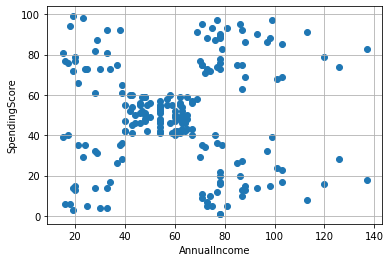

In [18]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

## Si = WCSS = Sum of squared distance between individual data points and its closest cluster. The sum is computed for all the data points

### K = 1, S1
### K = 2, S2
### K = 3, S3
### K = 4, S4

## S1>S2>S3>S4 :
### because as we increase the number of clusters, the distance between the data points and its closest clusters tends to decrease, thus the sum (wcss) decreases as the number of clusters increase.

In [21]:
from sklearn.cluster import KMeans

WCSS
 [269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.814510710006, 30241.34361793659, 25043.890043290045, 21818.11458845218, 19657.783608703958, 18417.02447089732, 15926.627039985106, 14292.543823365124, 13227.684902597402, 11718.493442084233, 11148.030994397759, 10000.542420797592, 9362.945431761222, 8577.523992673992]


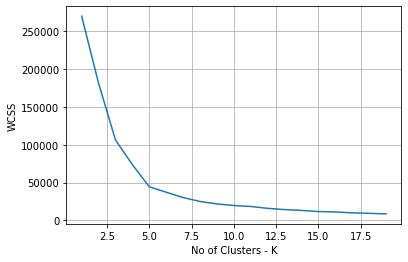

In [22]:
wcss = []
for i in range(1,20):          # i = 1,2,....19
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)
    
print('WCSS\n',wcss)
plt.plot(list(range(1,20)),wcss)
plt.xlabel('No of Clusters - K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Inference
The optimal number of clusters is 5

## Silhoutte Score
<b>1)</b> It is a clustering performance metrics<br>
<b>2)</b> It ranges between 0 and 1<br>
<b>3)</b> The closer the values are to 1, the better the clusters<br>
<b>4)</b> Formula = (b-a)/max(a,b)<br>
where<br>
a = mean intra-cluster distance<br>
b = mean nearest-cluster distance for each sample

In [25]:
from sklearn.metrics import silhouette_score

In [28]:
for i in range(2,15):
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at Cluster {i} is {silhouette_score(x,m.labels_)}')

Silhoutte Score at Cluster 2 is 0.2968969162503008
Silhoutte Score at Cluster 3 is 0.46761358158775435
Silhoutte Score at Cluster 4 is 0.4931963109249047
Silhoutte Score at Cluster 5 is 0.553931997444648
Silhoutte Score at Cluster 6 is 0.5379675585622219
Silhoutte Score at Cluster 7 is 0.5281944387251989
Silhoutte Score at Cluster 8 is 0.4579252386192864
Silhoutte Score at Cluster 9 is 0.4452052104330682
Silhoutte Score at Cluster 10 is 0.4477405371237999
Silhoutte Score at Cluster 11 is 0.4368076095752402
Silhoutte Score at Cluster 12 is 0.43848115100975016
Silhoutte Score at Cluster 13 is 0.43203846558338826
Silhoutte Score at Cluster 14 is 0.4239283876511737


### Optimal number of clusters  = 5

### Apply KMeans at K=5

In [29]:
k5 = KMeans(n_clusters=5)
k5.fit(x)

KMeans(n_clusters=5)

In [30]:
ypred5 = k5.predict(x)
print(ypred5)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [31]:
cent5 = k5.cluster_centers_
print(cent5)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


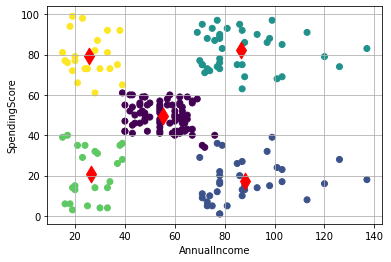

In [40]:
plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

### Apply KMeans at K=3

In [41]:
k3 = KMeans(n_clusters=3)
k3.fit(x)

KMeans(n_clusters=3)

In [42]:
ypred3 = k3.predict(x)
print(ypred3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [43]:
cent3 = k3.cluster_centers_
print(cent3)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]


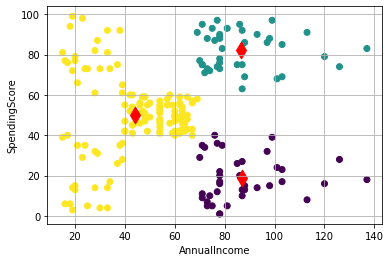

In [44]:
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

### Apply KMeans at K=4

In [45]:
k4 = KMeans(n_clusters=4)
k4.fit(x)

KMeans(n_clusters=4)

In [46]:
ypred4 = k4.predict(x)
print(ypred4)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [47]:
cent4 = k4.cluster_centers_
print(cent4)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [48.26       56.48      ]
 [26.30434783 20.91304348]]


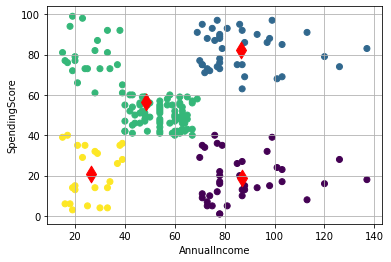

In [48]:
plt.scatter(x[:,0],x[:,1],c=ypred4)
plt.scatter(cent4[:,0],cent4[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

### Apply KMeans at K=6

In [49]:
k6 = KMeans(n_clusters=6)
k6.fit(x)

KMeans(n_clusters=6)

In [50]:
ypred6 = k6.predict(x)
print(ypred6)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 5 0 5 2 5 2 5 0 5 2 5 2 5 2 5 2 5 0 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [51]:
cent6 = k6.cluster_centers_
print(cent6)

[[ 55.2962963   49.51851852]
 [ 26.30434783  20.91304348]
 [ 88.2         17.11428571]
 [108.18181818  82.72727273]
 [ 25.72727273  79.36363636]
 [ 78.03571429  81.89285714]]


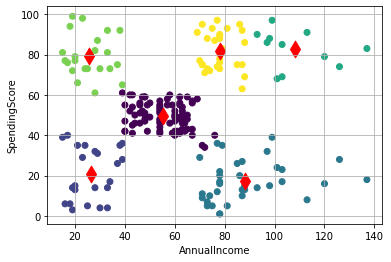

In [52]:
plt.scatter(x[:,0],x[:,1],c=ypred6)
plt.scatter(cent6[:,0],cent6[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()

### Apply KMeans at K=7

In [53]:
k7 = KMeans(n_clusters=7)
k7.fit(x)

KMeans(n_clusters=7)

In [54]:
ypred7 = k7.predict(x)
print(ypred7)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 5 3 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 5 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 6 1 6 1 6 1
 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6]


In [55]:
cent7 = k7.cluster_centers_
print(cent7)

[[ 25.72727273  79.36363636]
 [109.7         22.        ]
 [ 78.03571429  81.89285714]
 [ 26.30434783  20.91304348]
 [ 79.          16.59259259]
 [ 54.88607595  49.89873418]
 [108.18181818  82.72727273]]


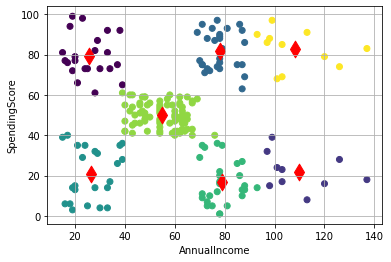

In [56]:
plt.scatter(x[:,0],x[:,1],c=ypred7)
plt.scatter(cent7[:,0],cent7[:,1],color='red',marker='d',s=140)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.grid()
plt.show()